# Netflix Movies and TV shows

### 1. Importing libraries 
### 2. Importing data
### 3. Dropping columns
### 4. The elbow technique
### 5. k-means clustering
### 6. Plot analysis
### 7. Grouping

# 1. Importing libraries 

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.cluster import KMeans
import pylab as pl

In [2]:
# This command propts matplotlib visuals to appear in the notebook 

%matplotlib inline

# 2. Importing data

In [3]:
# Defining a path
path = r'C:\Users\franc\Documents\Netflix Movies and tv shows'

In [4]:
# Importing the dataset
df= pd.read_pickle(os.path.join(path, 'Data','Prepared Data', 'final.pkl'))

In [5]:
# Getting info about the data sets
df.shape

(6105, 16)

In [6]:
df.head()

,id,title,type,release_year,lenght,genres,production_countries,seasons,imdb_score,imdb_votes,tmdb_popularity,tmdb_score,genre,country,imdb_score_level,tmdb_score_level
0,ts300399,Five Came Back: The Reference Films,show,1945,51,documentation,US,1,6.536443,0,0.600000,6.629937,documentation,US,NaN,NaN
1,tm82169,Rocky,movie,1976,119,"drama, sport",US,0,8.100000,588100,106.400002,7.800000,drama,US,NaN,High score
2,tm17823,Grease,movie,1978,110,"romance, comedy",US,0,7.200000,283316,33.200001,7.400000,romance,US,High score,High score
3,tm191099,The Sting,movie,1973,129,"crime, drama, comedy, music",US,0,8.300000,266738,24.600000,8.000000,crime,US,NaN,High score
4,tm69975,Rocky II,movie,1979,119,"drama, sport",US,0,7.300000,216307,75.699997,7.200000,drama,US,High score,High score


# 3. Dropping columns

In [7]:
# Removing any categorical columns from the dataset
df1 = df.drop(columns =['id','title','type','genres','production_countries','genre','country','imdb_score_level','tmdb_score_level'])

In [8]:
df1.head(5)

,release_year,lenght,seasons,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
0,1945,51,1,6.536443,0,0.600000,6.629937
1,1976,119,0,8.100000,588100,106.400002,7.800000
2,1978,110,0,7.200000,283316,33.200001,7.400000
3,1973,129,0,8.300000,266738,24.600000,8.000000
4,1979,119,0,7.300000,216307,75.699997,7.200000


# 4. The elbow technique

In [9]:
# Defining the range of the cluster
num_cl = range(1, 10) 
# Then, defining the k-means cluster in the above range.
kmeans = [KMeans(n_clusters=i) for i in num_cl] 

In [10]:
# Creating a score for each of the ranges created.
score = [kmeans[i].fit(df1).score(df1) for i in range(len(kmeans))] 

score

[-47243963715743.51,
 -21589929168748.688,
 -7822966860385.912,
 -4348629982673.807,
 -2861624967903.0835,
 -2103846473900.5125,
 -1588028444745.514,
 -1092703972825.1112,
 -852294847955.3662]

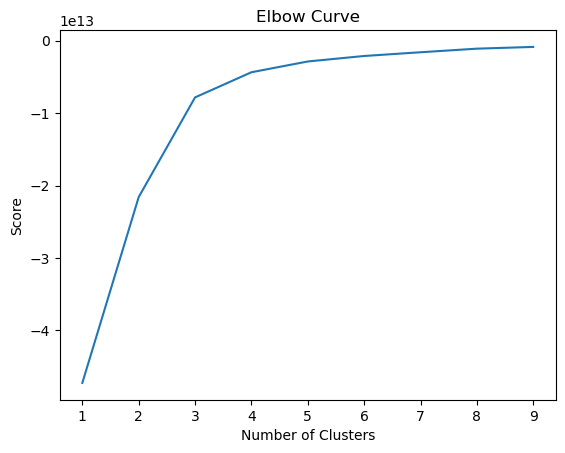

In [11]:
# Plotting the elbow curve using PyLab.

pl.plot(num_cl,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

As shown in the visualization above, the breaking point of the curve climbs significantly from three to four on the x-axis, then increases just little after four. As a result, I shall use 3 clusters.

# 5. k-means clustering

In [12]:
# Creating the k-means object.
kmeans = KMeans(n_clusters = 3) 

# Creating the k-means object.
kmeans = KMeans(n_clusters = 4) 

In [13]:
# Fitting the k-means object to the data.
kmeans.fit(df1)

KMeans(n_clusters=3)

In [14]:
# Adding a column to the dataframe with values indicating which cluster each observation corresponds to
df1['clusters'] = kmeans.fit_predict(df1)

In [15]:
# Checking the results
df1.head()

,release_year,lenght,seasons,imdb_score,imdb_votes,tmdb_popularity,tmdb_score,clusters
0,1945,51,1,6.536443,0,0.600000,6.629937,0
1,1976,119,0,8.100000,588100,106.400002,7.800000,1
2,1978,110,0,7.200000,283316,33.200001,7.400000,1
3,1973,129,0,8.300000,266738,24.600000,8.000000,1
4,1979,119,0,7.300000,216307,75.699997,7.200000,1


In [16]:
df1['clusters'].value_counts()

0    5978
1     120
2       7
Name: clusters, dtype: int64

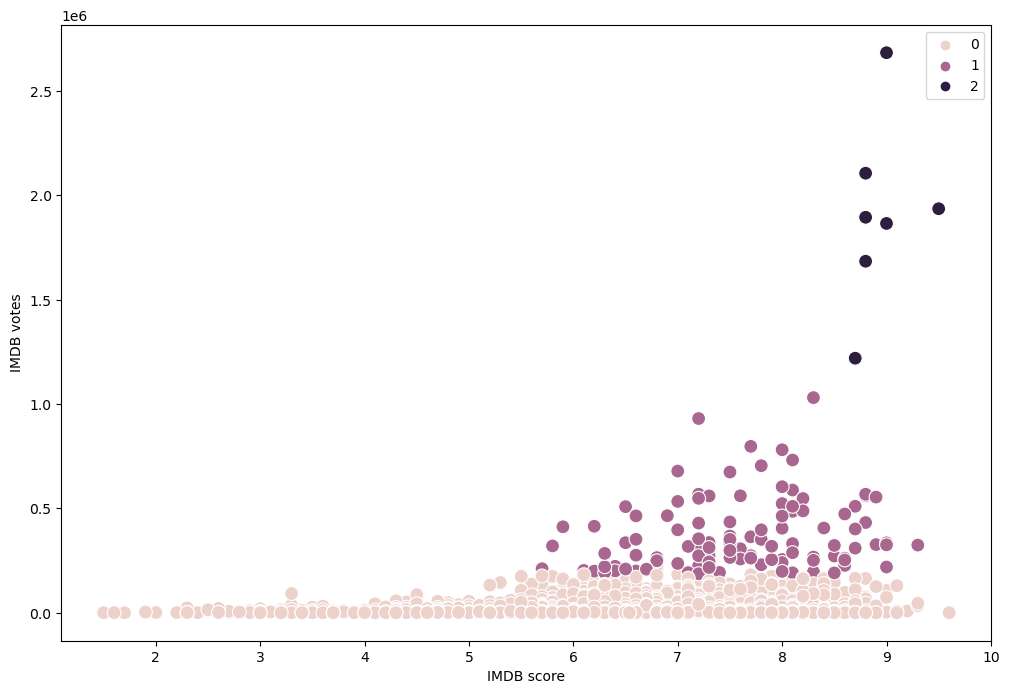

In [17]:
# Plotting the clusters for the "imdb_score" and "imdb_votes" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df1['imdb_score'], y=df1['imdb_votes'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('IMDB score') # Label x-axis.
plt.ylabel('IMDB votes') # Label y-axis.
plt.show()

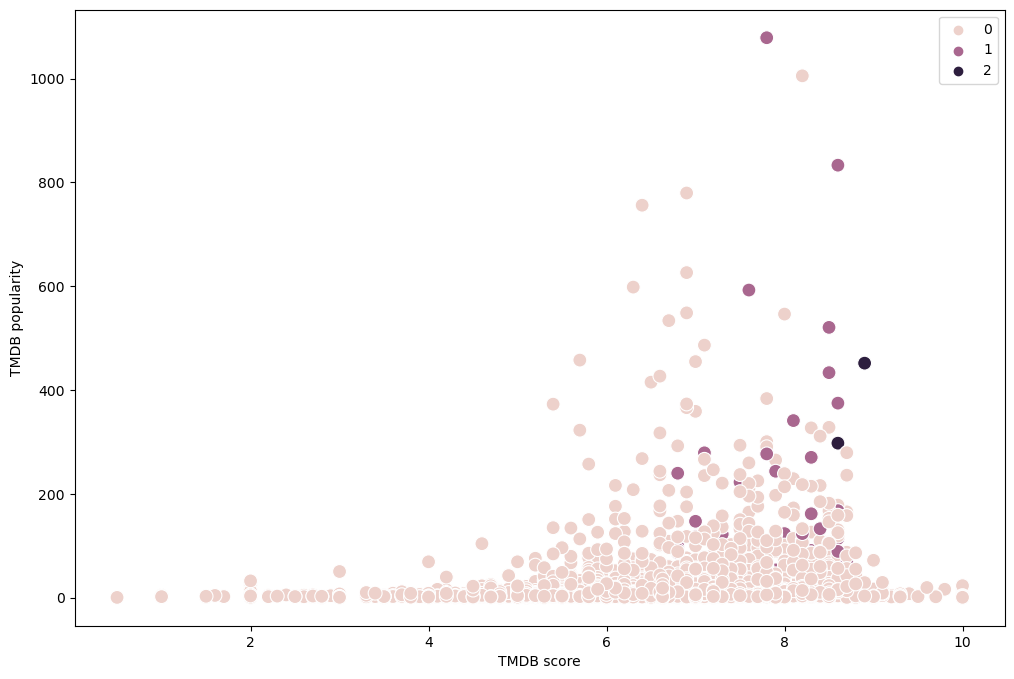

In [18]:
# Plotting the clusters for the "tmdb_score" and "tmdb_popularity" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df1['tmdb_score'], y=df1['tmdb_popularity'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('TMDB score') # Label x-axis.
plt.ylabel('TMDB popularity') # Label y-axis.
plt.show()

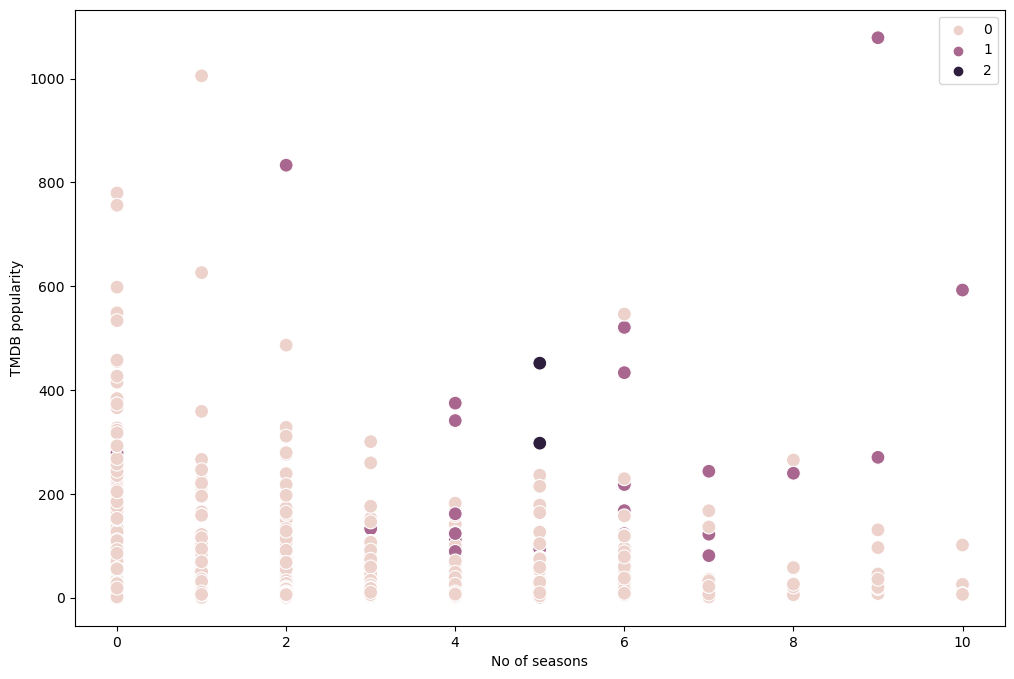

In [19]:
# Plotting the clusters for the "seasons" and "tmdb_popularity" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df1['seasons'], y=df1['tmdb_popularity'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('No of seasons') # Label x-axis.
plt.ylabel('TMDB popularity') # Label y-axis.
plt.show()

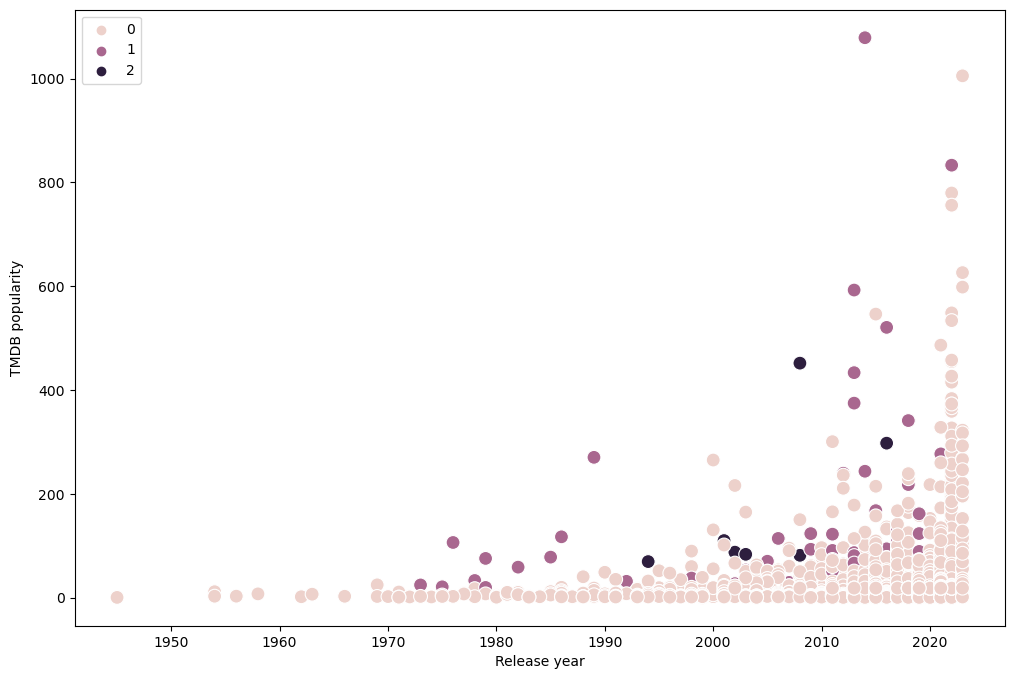

In [20]:
# Plotting the clusters for the "release_year" and "tmdb_popularity" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df1['release_year'], y=df1['tmdb_popularity'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('Release year') # Label x-axis.
plt.ylabel('TMDB popularity') # Label y-axis.
plt.show()

# 6. Plot analysis

IMDB scores & IMDB votes: The first cluster (0) represents all movies and TV series with a low number of IMDB votes. Instead, clusters 1 and 2 reflect all of the movies and TV series with an IMDB score of 5/6 or better that have received a higher number of votes. A few titles with a high rating (9–10) and numerous votes are shown in cluster 1. However, we can see that the most popular titles have an IMDB rating of between 6 and 9.

TMDB scores & popularity: The first cluster (0) dominates the visualization, while the other two are barely visible. However, we can see that the more popular films have TMDB scores ranging from 6 to 9.

Seasons & TMDB popularity: In this visualization, the initial cluster (0) dominates the visualization once more. Nevertheless, we observe that the most popular titles are typically movies or series with two to six  seasons.

Release year & TMDB popularity: In this last graph, the pink cluster (zero) again outperformed the others. This chart reveals a brand-new, interesting pattern: the most popular titles are those that were published most recently (after 2010)

# 7.Grouping

In [21]:
df.loc[df1['clusters'] == 2, 'cluster'] = 'dark purple'
df.loc[df1['clusters'] == 1, 'cluster'] = 'purple'
df.loc[df1['clusters'] == 0, 'cluster'] = 'pink'

In [22]:
df.groupby('cluster').agg({'imdb_score':['mean', 'median'], 
                         'imdb_votes':['mean', 'median'], 
                         'tmdb_score':['mean', 'median'],
                         'seasons':['mean', 'median'], 
                         'release_year':['mean', 'median'],
                          'tmdb_popularity':['mean', 'median']})

imdb_score              imdb_votes            tmdb_score         \
                  mean    median          mean     median       mean median   
cluster                                                                       
dark purple   8.942857  8.800000  1.913440e+06  1895545.0   8.542857    8.5   
pink          6.513463  6.536443  1.011691e+04     1556.0   6.611623    6.7   
purple        7.540833  7.500000  3.584491e+05   315121.0   7.430250    7.4   

              seasons        release_year         tmdb_popularity             
                 mean median         mean  median            mean     median  
cluster                                                                       
dark purple  1.428571    0.0  2004.571429  2003.0      168.899994  87.800003  
pink         0.680495    0.0  2017.609903  2019.0       16.813673   7.400000  
purple       1.350000    0.0  2010.075000  2013.0       95.864166  48.250000

This analysis reveals new trends and intriguing insights that I intend to investigate more. However, in order to test the third hypothesis (Countries which create the most content also produce the highest-rated TV shows and movies.), I would have to include categorical variables as well.

In [23]:
# Exporting data to csv
df1.to_csv(os.path.join(path, 'Data','Prepared Data', 'clusters.csv'))